In [133]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [134]:
path = '/content/drive/MyDrive/PatternLab/train-perceptron.txt'
df = pd.read_csv(path , sep = " ", header = None)
df

,0,1,2
0,1,1.0,1
1,1,-1.0,1
2,2,2.5,2
3,0,2.0,2
4,2,3.0,2
5,4,5.0,1


In [135]:
c1 = df[ df[2] == 1]
c2 = df[ df[2] == 2]


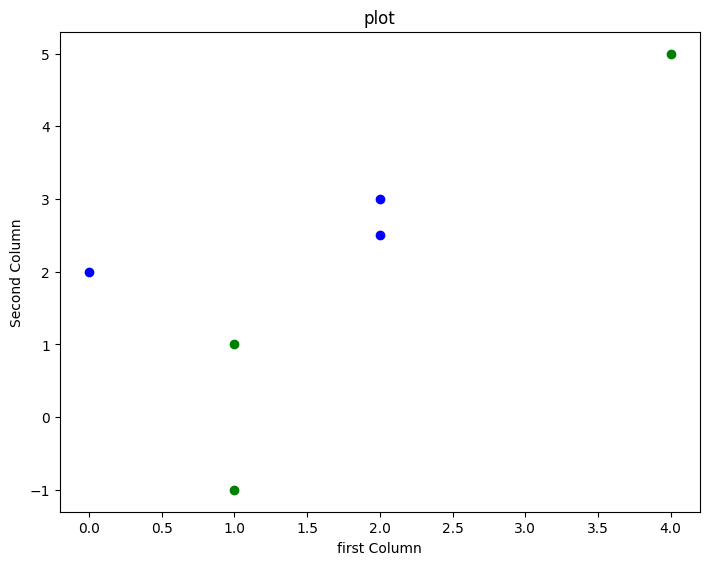

In [136]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(c1[0], c1[1], color='g')
ax.scatter(c2[0], c2[1] , color='b')
ax.set_xlabel('first Column')
ax.set_ylabel('Second Column')
ax.set_title('plot')
plt.show()

In [137]:

lst = []

for i in df.index:
  lst.append( [df[0][i]**2, df[1][i]**2, df[0][i]*df[1][i], df[0][i], df[1][i], 1])

for i in lst:
  print(i)

#Normalizing

for i in df.index:
  if df[2][i] == 1:
    for j in range(0,6,1):
      lst[i][j] = lst[i][j]*-1

print('\n\n')
for i in lst:
  print(i)

[1, 1.0, 1.0, 1, 1.0, 1]
[1, 1.0, -1.0, 1, -1.0, 1]
[4, 6.25, 5.0, 2, 2.5, 1]
[0, 4.0, 0.0, 0, 2.0, 1]
[4, 9.0, 6.0, 2, 3.0, 1]
[16, 25.0, 20.0, 4, 5.0, 1]



[-1, -1.0, -1.0, -1, -1.0, -1]
[-1, -1.0, 1.0, -1, 1.0, -1]
[4, 6.25, 5.0, 2, 2.5, 1]
[0, 4.0, 0.0, 0, 2.0, 1]
[4, 9.0, 6.0, 2, 3.0, 1]
[-16, -25.0, -20.0, -4, -5.0, -1]


In [138]:
arr = np.array(lst, dtype=np.float64)
print(arr)
print(arr.shape)

[[ -1.    -1.    -1.    -1.    -1.    -1.  ]
 [ -1.    -1.     1.    -1.     1.    -1.  ]
 [  4.     6.25   5.     2.     2.5    1.  ]
 [  0.     4.     0.     0.     2.     1.  ]
 [  4.     9.     6.     2.     3.     1.  ]
 [-16.   -25.   -20.    -4.    -5.    -1.  ]]
(6, 6)


In [139]:
one_at_a_time_zero = []

for j in range(1,11,1):
  lr = float(j/10)
  w = [0,0,0,0,0,0]

  count = 0
  while(1):
    correct = 6
    value = []
    for x in arr:
      val = np.dot(x, w)
      #print(val)
      value.append(val)
      if val <= 0:
        w = w + lr*x
      else:
        #print('correct')
        correct = correct - 1

    count = count + 1
    if correct == 0:
      #print(value)

      break
  one_at_a_time_zero.append(count)

  print(count)

141
141
141
141
141
141
141
141
141
141


In [140]:
one_at_a_time_one = []

for j in range(1,11,1):
  lr = float(j/10)
  w = [1,1,1,1,1,1]

  count = 0
  while(1):
    correct = 6
    value = []
    for x in arr:
      val = np.dot(x, w)
      #print(val)
      value.append(val)
      if val <= 0:
        w = w + lr*x
      else:
        #print('correct')
        correct = correct - 1

    count = count + 1
    if correct == 0:
      #print(value)
      break
  one_at_a_time_one.append(count)

  print(count)

143
158
153
137
143
140
148
149
153
142


In [141]:
import random

random.seed(5)
one_at_a_time_random = []

for j in range(1,11,1):
  lr = float(j/10)
  w = [random.random() ,random.random() ,random.random() ,random.random() ,random.random(),random.random()]

  count = 0
  while(1):
    correct = 6
    value = []
    for x in arr:
      val = np.dot(x, w)
      #print(val)
      value.append(val)
      if val <= 0:
        w = w + lr*x
      else:
        #print('correct')
        correct = correct - 1

    count = count + 1
    if correct == 0:
      #print(value)
      break
  one_at_a_time_random.append(count)
  print(count)

149
137
149
141
136
150
2
149
157
157


In [142]:
many_at_a_time_zero = []

for j in range(1,11,1):
  lr = float(j/10)
  w = [0,0,0,0,0,0]

  count = 0
  temp_add = np.zeros(6)
  while(1):
    correct = 6
    value = []
    for x in arr:
      val = np.dot(x, w)
      #print(val)
      value.append(val)
      if val <= 0:
        temp_add = temp_add + x
      else:
        #print('correct')
        correct = correct - 1

    count = count + 1
    if correct == 0:
      #print(value)
      break
    else:
      w = w + (lr * temp_add)

  many_at_a_time_zero.append(count)

In [143]:
many_at_a_time_one = []

for j in range(1,11,1):
  lr = float(j/10)
  w = [1,1,1,1,1,1]

  count = 0
  temp_add = np.zeros(6)
  while(1):
    correct = 6
    value = []
    for x in arr:
      val = np.dot(x, w)
      #print(val)
      value.append(val)
      if val <= 0:
        temp_add = temp_add + x
      else:
        #print('correct')
        correct = correct - 1

    count = count + 1
    if correct == 0:
      #print(value)
      break
    else:
      w = w + (lr * temp_add)
  many_at_a_time_one.append(count)


In [144]:
many_at_a_time_random = []
learning_rate = []
random.seed(5)

for j in range(1,11,1):
  lr = float(j/10)
  learning_rate.append(lr)
  w = [random.random() ,random.random() ,random.random() ,random.random() ,random.random(),random.random()]

  count = 0
  temp_add = np.zeros(6)
  while(1):
    correct = 6
    value = []
    for x in arr:
      val = np.dot(x, w)
      #print(val)
      value.append(val)
      if val <= 0:
        temp_add = temp_add + x
      else:
        #print('correct')
        correct = correct - 1

    count = count + 1
    if correct == 0:
      #print(value)
      break
    else:
      w = w + (lr * temp_add)
  many_at_a_time_random.append(count)

In [145]:
#zeror jonno
initial_w_all_zero = pd.DataFrame({
    'Learning Rate': learning_rate,
    'One at a time': one_at_a_time_zero,
    'Many At a time': many_at_a_time_zero,
})
initial_w_all_zero

,Learning Rate,One at a time,Many At a time
0,0.1,141,61
1,0.2,141,61
2,0.3,141,61
3,0.4,141,61
4,0.5,141,61
5,0.6,141,61
6,0.7,141,61
7,0.8,141,61
8,0.9,141,61
9,1.0,141,61


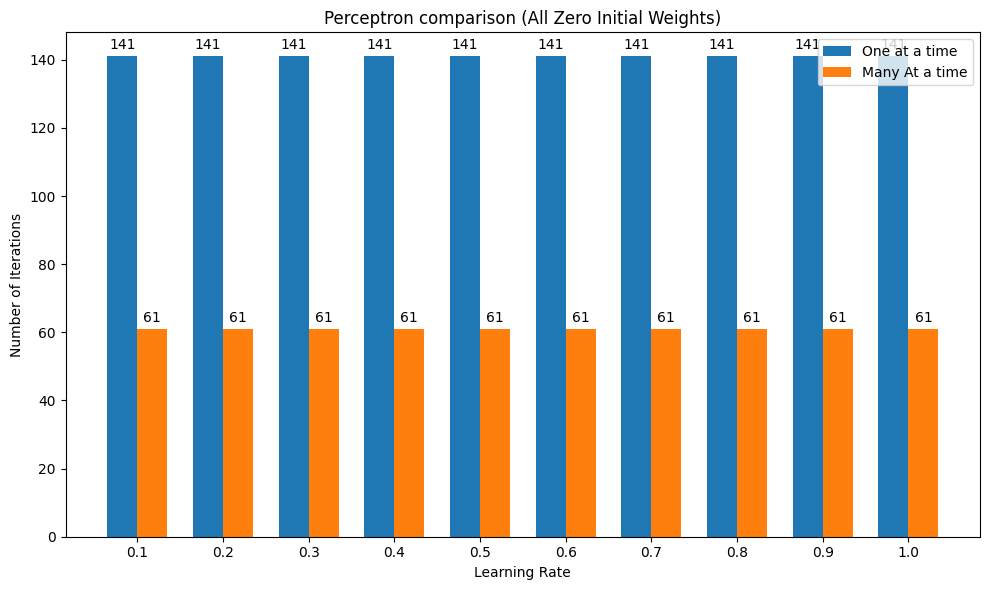

In [146]:
fig, ax = plt.subplots(figsize=(10, 6))

# Define bar width and positions
bar_width = 0.35
x = np.arange(len(learning_rate))

# Plotting bars
rects1 = ax.bar(x - bar_width/2, one_at_a_time_zero, bar_width, label='One at a time')
rects2 = ax.bar(x + bar_width/2, many_at_a_time_zero, bar_width, label='Many At a time')

# Set labels and title
ax.set_xlabel('Learning Rate')
ax.set_ylabel('Number of Iterations')
ax.set_title('Perceptron comparison (All Zero Initial Weights)')
ax.set_xticks(x)
ax.set_xticklabels(learning_rate)
ax.legend()

# Function to annotate bars with values
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Add annotations
autolabel(rects1)
autolabel(rects2)

# Show plot
plt.tight_layout()
plt.show()


In [147]:
#one er jonno
initial_w_all_one = pd.DataFrame({
    'Learning Rate': learning_rate,
    'One at a time': one_at_a_time_one,
    'Many At a time': many_at_a_time_one,
})
initial_w_all_one

,Learning Rate,One at a time,Many At a time
0,0.1,143,50
1,0.2,158,22
2,0.3,153,32
3,0.4,137,84
4,0.5,143,84
5,0.6,140,84
6,0.7,148,84
7,0.8,149,81
8,0.9,153,81
9,1.0,142,81


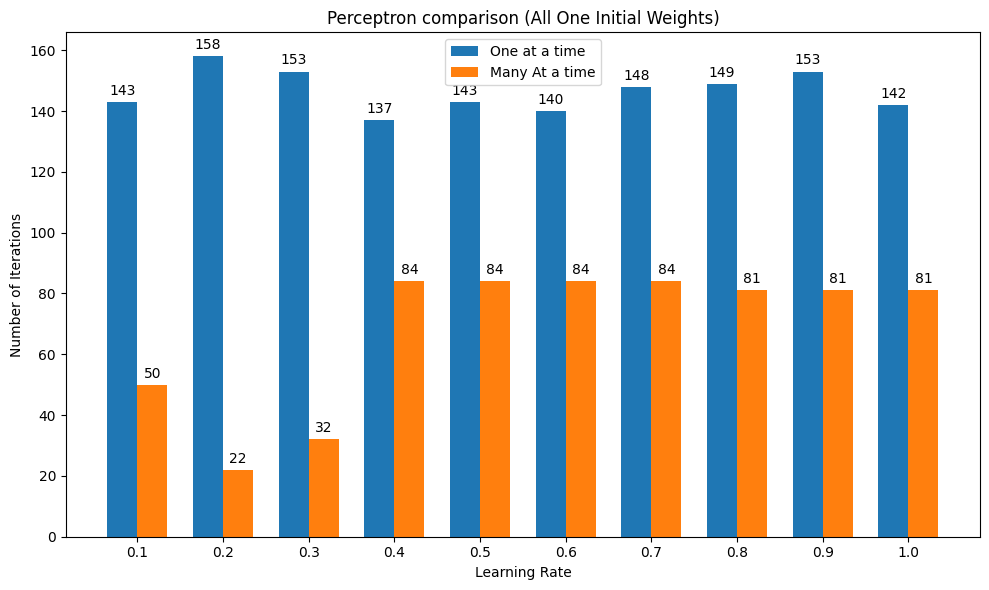

In [148]:
# graph
fig, ax = plt.subplots(figsize=(10, 6))

# Define bar width and positions
bar_width = 0.35
x = np.arange(len(learning_rate))

# Plotting bars
rects1 = ax.bar(x - bar_width/2, one_at_a_time_one, bar_width, label='One at a time')
rects2 = ax.bar(x + bar_width/2, many_at_a_time_one, bar_width, label='Many At a time')

# Set labels and title
ax.set_xlabel('Learning Rate')
ax.set_ylabel('Number of Iterations')
ax.set_title('Perceptron comparison (All One Initial Weights)')
ax.set_xticks(x)
ax.set_xticklabels(learning_rate)
ax.legend()

# Function to annotate bars with values
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Add annotations
autolabel(rects1)
autolabel(rects2)

# Show plot
plt.tight_layout()
plt.show()


In [149]:

initial_w_all_random = pd.DataFrame(
    {
        'Learning Rate': learning_rate,
      'One at a time': one_at_a_time_random,
     'Many At a time': many_at_a_time_random,
    })
initial_w_all_random

,Learning Rate,One at a time,Many At a time
0,0.1,149,100
1,0.2,137,62
2,0.3,149,81
3,0.4,141,61
4,0.5,136,81
5,0.6,150,81
6,0.7,2,81
7,0.8,149,111
8,0.9,157,81
9,1.0,157,89


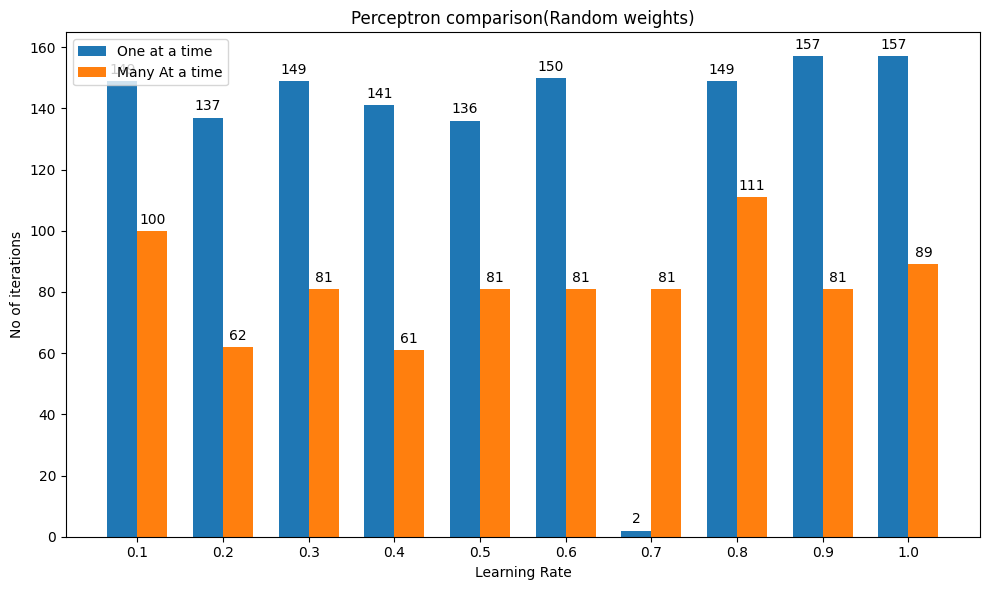

In [150]:
fig, ax = plt.subplots(figsize=(10, 6))

# Define bar width and positions
bar_width = 0.35
x = np.arange(len(learning_rate))

# Plotting bars
rects1 = ax.bar(x - bar_width/2, one_at_a_time_random, bar_width, label='One at a time')
rects2 = ax.bar(x + bar_width/2, many_at_a_time_random, bar_width, label='Many At a time')

# Set labels and title
ax.set_xlabel('Learning Rate')
ax.set_ylabel('No of iterations')
ax.set_title('Perceptron comparison(Random weights)')
ax.set_xticks(x)
ax.set_xticklabels(learning_rate)
ax.legend()

# Function to annotate bars with values
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Add annotations
autolabel(rects1)
autolabel(rects2)

# Show plot
plt.tight_layout()
plt.show()
